<a href="https://colab.research.google.com/github/WoobeenJeong/bioinfo1_jwb/blob/main/Project_006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Data mounting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2) Environment setting**

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

In [ ]:
!conda install -y bedtools bioawk samtools

**3) Data loading & check**

**4) Background setting**

In [4]:
%cd /content/drive/MyDrive/binfo1-work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

/content/drive/MyDrive/binfo1-work


In [ ]:
!gzip -d gencode.vM32.annotation.gtf.gz

In [ ]:
!grep 'chr9' gencode.vM32.annotation.gtf > gencode.vM32.chr9.gtf

In [ ]:
f50pileup = pd.read_csv('f50pileup.csv')

In [ ]:
f50pileup.head()

,Unnamed: 0,chrom,pos,ref,count,basereads,quals,matches,base_count
0,21616,chr9,3359542,N,51,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,HDEIHIIGIIIHHIIGAIIIGIBGIHBFGIHE?GIGIHGGHHIBII...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,51
1,21617,chr9,3359543,N,51,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,IGEIHFG@IIIHHHIGFHIIEIBHIH;GGIHH=GIEIHIGHHIGII...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,51
2,21618,chr9,3359544,N,51,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,IHBIHIIDHGIGHIIIDIIIDH0HH?DEHFHBBGIGIHIGHHDAII...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,51
3,21619,chr9,3359545,N,51,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,IH8IHIIEIGIGHIIFFIIIGI=HIHDGGIHI;GHIIGHGHHI4DI...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,51
4,21620,chr9,3359546,N,51,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,IHEIHHIEIGGDHIIDHIIIGI7HIH>GHIHI<GIGIFIGDHFCII...,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,51


In [ ]:
subpup = pup[(pup['shannon'] > 0.2) & (pup['pos'] > 1.0e8)]

In [ ]:
subpup

In [ ]:
target = subpup[['chrom','pos']]
target['start'] = target['pos'] -7
target['stop'] = target['pos'] +6
target['shannon'] = subpup[['shannon']]
target = target.drop('pos', axis=1)

In [ ]:
target.to_csv("target.bed",header=None, index=False, sep='\t')

120788886	- 123291148	서열 확인  
123290888	- 123291148	서열 확인



In [ ]:
!grep "ENSMUSG00000035202.9" gencode.vM32.pc_transcripts.fa

>ENSMUST00000038863.9|ENSMUSG00000035202.9|OTTMUSG00000062845.1|OTTMUST00000153045.1|Lars2-201|Lars2|3894|UTR5:1-199|CDS:200-2908|UTR3:2909-3894|
>ENSMUST00000217116.2|ENSMUSG00000035202.9|OTTMUSG00000062845.1|OTTMUST00000153048.1|Lars2-209|Lars2|3756|UTR5:1-172|CDS:173-1660|UTR3:1661-3756|
>ENSMUST00000216843.2|ENSMUSG00000035202.9|OTTMUSG00000062845.1|OTTMUST00000153049.1|Lars2-208|Lars2|720|UTR5:1-455|CDS:456-720|
>ENSMUST00000215464.2|ENSMUSG00000035202.9|OTTMUSG00000062845.1|OTTMUST00000153050.1|Lars2-206|Lars2|554|CDS:1-364|UTR3:365-554|


In [ ]:
!awk -F'\t' '{if ($3 == "gene" && $4 <= 123290888 && $5 >= 123291148 ) print}' gencode.vM32.chr9.gtf

chr9	HAVANA	gene	123195992	123291731	.	+	.	gene_id "ENSMUSG00000035202.9"; gene_type "protein_coding"; gene_name "Lars2"; level 2; mgi_id "MGI:2142973"; havana_gene "OTTMUSG00000062845.1";


In [ ]:
!wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M32/GRCm39.genome.fa.gz

In [ ]:
!gzip -d GRCm39.genome.fa.gz

In [43]:
!bedtools getfasta -fi GRCm39.genome.fa -bed target_mirlet7g.bed -fo target_mirlet7g.fa

In [44]:
!grep '[A-Z][A-Z][A-Z][A-Z][A-Z][A-Z]G[A-Z][A-Z][A-Z][A-Z][A-Z][A-Z]' target_mirlet7g.fa > G_target_mirlet7g.fa

재시작 시, 여기서부터 

In [45]:
!head G_target_mirlet7g.fa

ACAAATGATGTAG
AGCGCTGGTGAAA
ATGCTTGGGTAAG
ACAAACGTGAAAT
ACTTATGAGAAGC
CTGCAGGGGTCCT
CTCCAGGAATGAA
TCAGTCGAGCTGA
GTTCTAGTGAACC
AGAACCGAGTAAT


In [46]:
with open('G_target_mirlet7g.fa', 'r') as file:
    sequences = file.readlines()

sequences = [seq.strip() for seq in sequences]

counts = { 'A': [], 'T': [], 'G': [], 'C': [] }

for position in range(0, 13):
    nucleotide_counts = { 'A': 0, 'T': 0, 'G': 0, 'C': 0 }
    for sequence in sequences:
        base = sequence[position]
        nucleotide_counts[base] += 1
    for nucleotide, count in nucleotide_counts.items():
        counts[nucleotide].append(count)
df = pd.DataFrame(counts)
df.insert(0, 'pos', range(-6,7))
df

,pos,A,T,G,C
0,-6,8,3,1,2
1,-5,3,4,2,5
2,-4,6,2,4,2
3,-3,4,1,4,5
4,-2,7,3,0,4
5,-1,3,5,3,3
6,0,0,0,14,0
7,1,6,3,4,1
8,2,1,4,9,0
9,3,4,4,5,1


In [47]:
sum_row = df.sum(axis=1)
percentages = df.iloc[:, 1:].div(sum_row, axis=0)
result = pd.concat([df['pos'], percentages], axis=1)
result = result.set_index('pos')
result

,A,T,G,C
pos,,,,
-6,1.000000,0.375000,0.125000,0.250000
-5,0.333333,0.444444,0.222222,0.555556
-4,0.600000,0.200000,0.400000,0.200000
-3,0.363636,0.090909,0.363636,0.454545
-2,0.583333,0.250000,0.000000,0.333333
-1,0.230769,0.384615,0.230769,0.230769
0,0.000000,0.000000,1.000000,0.000000
1,0.400000,0.200000,0.266667,0.066667
2,0.062500,0.250000,0.562500,0.000000


In [48]:
sum_row = df.iloc[:, 1:].sum(axis=1)
percentages = df.iloc[:, 1:].div(sum_row, axis=0)
normalize = pd.concat([df['pos'], percentages], axis=1)

In [49]:
normalize = normalize.set_index('pos')
normalize

,A,T,G,C
pos,,,,
-6,0.571429,0.214286,0.071429,0.142857
-5,0.214286,0.285714,0.142857,0.357143
-4,0.428571,0.142857,0.285714,0.142857
-3,0.285714,0.071429,0.285714,0.357143
-2,0.500000,0.214286,0.000000,0.285714
-1,0.214286,0.357143,0.214286,0.214286
0,0.000000,0.000000,1.000000,0.000000
1,0.428571,0.214286,0.285714,0.071429
2,0.071429,0.285714,0.642857,0.000000


In [50]:
!pip install logomaker
import logomaker

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.ion()

import logomaker as lm

이건 logomaker의 예시 파일 

In [ ]:
crp_df = -lm.get_example_matrix('crp_energy_matrix')
crp_df.head()

Description of example matrix "crp_energy_matrix":
# 
# CRP energy matrix from Kinney et al. (2010).
# Matrix values are in units of kcal/mol.
# 
# References
# 
# Kinney JB et al. (2010) Using deep sequencing to characterize the
# biophysical mechanism of a transcriptional regulatory sequence.
# Proc Natl Acad Sci USA. 107(20):9158–63.
# 



,A,C,G,T
pos,,,,
0,0.183642,-0.155864,-0.094136,0.066358
1,0.290123,-0.277778,-0.111111,0.098765
2,0.276235,-0.316358,-0.168210,0.208333
3,0.226852,-0.285494,-0.297840,0.356481
4,0.060185,-0.143519,-0.057099,0.140432


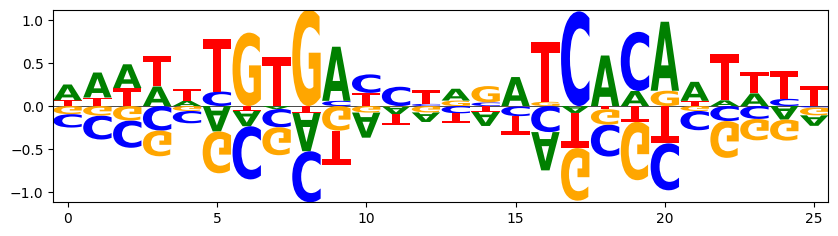

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(crp_df, font_name = 'sans-serif')

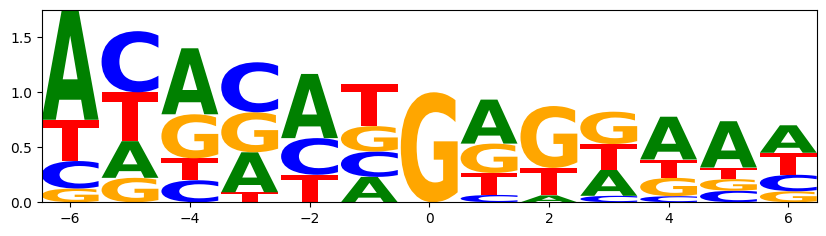

In [52]:
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(result, font_name = 'sans-serif')

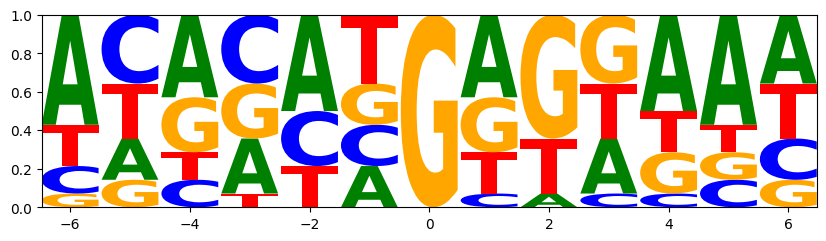

In [53]:
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(normalize, font_name = 'sans-serif')

In [54]:
df2=df
df2 = df.set_index('pos')

In [55]:
info_mat = lm.transform_matrix(df2, 
                                      from_type='counts', 
                                      to_type='information')

In [56]:
info_mat

,A,C,G,T
pos,,,,
-6,0.117377,0.039126,0.026084,0.052167
-5,0.010070,0.015105,0.007552,0.012587
-4,0.036993,0.015854,0.026424,0.015854
-3,0.025778,0.030933,0.025778,0.010311
-2,0.112370,0.070231,0.014046,0.056185
-1,0.005569,0.005569,0.005569,0.008354
0,0.060323,0.060323,0.904848,0.060323
1,0.047584,0.013596,0.033989,0.027191
2,0.047965,0.023982,0.239823,0.119912


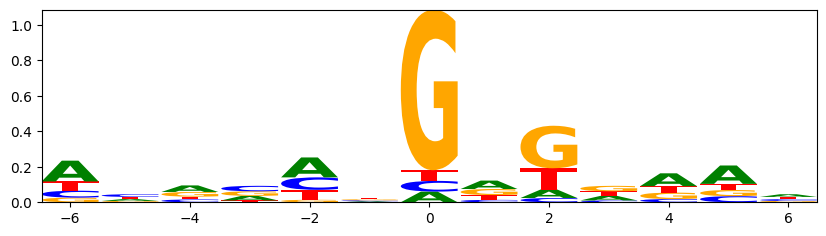

In [57]:
lm.Logo(info_mat)